# Titanic: Machine Learning from Disaster

### Description:

This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize myself with how the Kaggle platform works.

This competition is simple albeit morbid in terms of its topic: I will attempt to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

### Step 1: Data Acquisition

In this competition, two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. will be included: one dataset is titled `train.csv` and the other is titled `test.csv`.

The `train.csv` will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

#### The main objective here is to use the patterns found in the train.csv data to predict whether the other 418 passengers on board (found in test.csv) will survive.

In [282]:
# Initialize variables
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Get training and testing data
train_df = pd.DataFrame(pd.read_csv('train.csv'))
test_df = pd.DataFrame(pd.read_csv('test.csv'))
submission_file = pd.read_csv('gender_submission.csv')

### Step 2: Hypothesis Statement

In order to make connections between the training data and testing data, we must be able to determine which of the variables are needed to make such a connection plausible. The independent variable in this case would be the number of deaths following the disaster, but which of the other variables are likely to contribute towards those deaths?

Here are the variables to consider:
* PassengerId: a unique ID given to each and every passenger (some scalar number: quantitative)
* Survived: passengers that have survived (either 0 or 1: qualitative)
* Pclass: class in which each passenger have registered themselves through their ticket purchases (either 1,2, or 3: qualitative)
* Name: a passenger's name (some string of characters: qualitative)
* Sex: a passenger's biological orientation (either female or male: qualitative)
* Age: a passenger's biological age (some scalar number: quantitative)
* SibSp: if a passenger has a sibling(s) and/or a spouse (some scalar: quantitative)
* Parch: if a passenger has a parent(s) and/or a child(ren) (some scalar: quantitative)
* Ticket: a unique ticket number assigned to each passenger (some scalar: qualitative)
* Fare: the price of the ticket bought by a passenger (either)
* Cabin: a cabin designated by class corresponding to the ticket purchased by a passenger (some scalar number: quantiative)
* Embarked: the port which each passenger has embarkde from (either C, Q, or S: qualitative)

Based on the values listed above, I believe that age, sex, passenger class, and being in certain cabins will contributing factors towards the survivability of these unfortunate passengers. I've selected these variables solely based on a line in the movie, 'The Titanic', where the officers agreed to let the women and children go first. 

As such, to make things easier for myself, I will create a null hypothesis that determines if there is a meaningful difference across each and every attributes. Therefore :
 **there will be no difference deaths across passengers in terms of age, sex, passenger class, or cabin level.**


% Males that lived: 32.0;
% Males that died: 85.0;
% Females that lived: 68.0;
% Females that died: 15.0


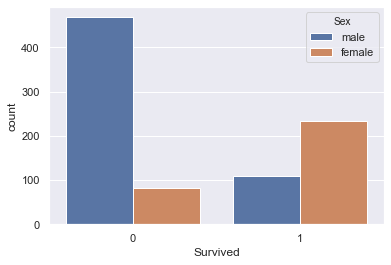

In [283]:
# List of passengers who lived and died
lived_df = train_df[train_df['Survived'] == 1]
died_df = train_df[train_df['Survived'] == 0]

# Determine if being of a specific sex could be a result of being alive or dead
male_lived = round(lived_df[lived_df['Sex'] == 'male']['Sex'].count()/lived_df['Sex'].count() * 100)
male_died = round(died_df[died_df['Sex'] == 'male']['Sex'].count()/died_df['Sex'].count() * 100)
female_lived = 100 - male_lived
female_died = 100 - male_died

# Print results
print('% Males that lived: {};\n% Males that died: {};\n% Females that lived: {};\n% Females that died: {}'.format(male_lived,male_died,female_lived,female_died))

# Graph results
sns.countplot(x='Survived', hue='Sex', data=train_df)

% Upper class that lived: 40.0;
% Middle class that lived: 25.0;
% Lower class that lived: 35.0

% Upper class that died: 15.0;
% Middle class that died: 18.0;
% Lower class that died: 68.0


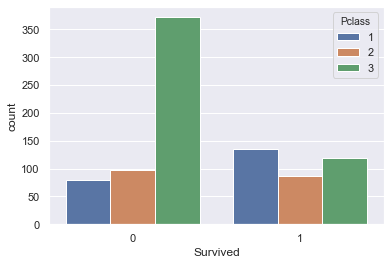

In [284]:
# Determine if being of a specific class could be a result of being alive or dead
upper_lived = round(lived_df[lived_df['Pclass'] == 1]['Pclass'].count()/lived_df['Pclass'].count() * 100)
middle_lived = round(lived_df[lived_df['Pclass'] == 2]['Pclass'].count()/lived_df['Pclass'].count() * 100)
lower_lived = round(lived_df[lived_df['Pclass'] == 3]['Pclass'].count()/lived_df['Pclass'].count() * 100)
upper_died = round(died_df[died_df['Pclass'] == 1]['Pclass'].count()/died_df['Pclass'].count() * 100)
middle_died = round(died_df[died_df['Pclass'] == 2]['Pclass'].count()/died_df['Pclass'].count() * 100)
lower_died = round(died_df[died_df['Pclass'] == 3]['Pclass'].count()/died_df['Pclass'].count() * 100)

# Print results
print('% Upper class that lived: {};\n% Middle class that lived: {};\n% Lower class that lived: {}\n'.format(upper_lived,middle_lived,lower_lived))
print('% Upper class that died: {};\n% Middle class that died: {};\n% Lower class that died: {}'.format(upper_died,middle_died,lower_died))

# Graph results
sns.countplot(x='Survived', hue='Pclass', data=train_df)


% Children that lived: 14.0;
% Adolescents that lived: 7.0;
% Adults that lived: 79.0;
% Elderly that lived: 0.0

% Children that died: 7.0;
% Adolescents that died: 5.0;
% Adults that died: 85.0;
% Elderly that died: 2.0



/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


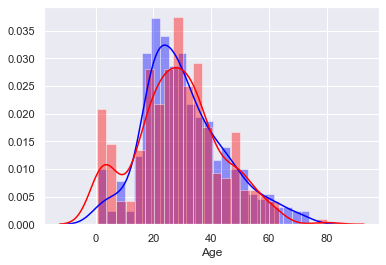

In [285]:
# Determine if being of a specific age range could be a result of being alive or dead
children_lived = round(lived_df[lived_df['Age'].between(0, 12, inclusive=True)]['Age'].count()/lived_df['Age'].count() * 100)
adolescents_lived = round(lived_df[lived_df['Age'].between(13, 17, inclusive=True)]['Age'].count()/lived_df['Age'].count() * 100)
adults_lived = round(lived_df[lived_df['Age'].between(18, 64, inclusive=True)]['Age'].count()/lived_df['Age'].count() * 100)
elderly_lived = round(lived_df[lived_df['Age'].between(65, 100, inclusive=True)]['Age'].count()/lived_df['Age'].count() * 100)
children_died = round(died_df[died_df['Age'].between(0, 12, inclusive=True)]['Age'].count()/died_df['Age'].count() * 100)
adolescents_died = round(died_df[died_df['Age'].between(13, 17, inclusive=True)]['Age'].count()/died_df['Age'].count() * 100)
adults_died = round(died_df[died_df['Age'].between(18, 64, inclusive=True)]['Age'].count()/died_df['Age'].count() * 100)
elderly_died = round(died_df[died_df['Age'].between(65, 100, inclusive=True)]['Age'].count()/died_df['Age'].count() * 100)

# Print results
print('% Children that lived: {};\n% Adolescents that lived: {};\n% Adults that lived: {};\n% Elderly that lived: {}\n'.format(children_lived,adolescents_lived,adults_lived, elderly_lived))
print('% Children that died: {};\n% Adolescents that died: {};\n% Adults that died: {};\n% Elderly that died: {}\n'.format(children_died,adolescents_died,adults_died, elderly_died))

# Graph age distribution of those that died of results
sns.distplot(train_df['Age'].where(train_df['Survived'] == 0), bins=24, color='blue')
# Graph age distribution of those that lived of results
sns.distplot(train_df['Age'].where(train_df['Survived'] == 1), bins=24, color='red')


       Lived
Cabin       
A          7
B         35
C         35
D         25
E         24
F          8
G          2 

        Died
Cabin      
A         8
B        12
C        24
D         8
E         8
F         5
G         2
T         1


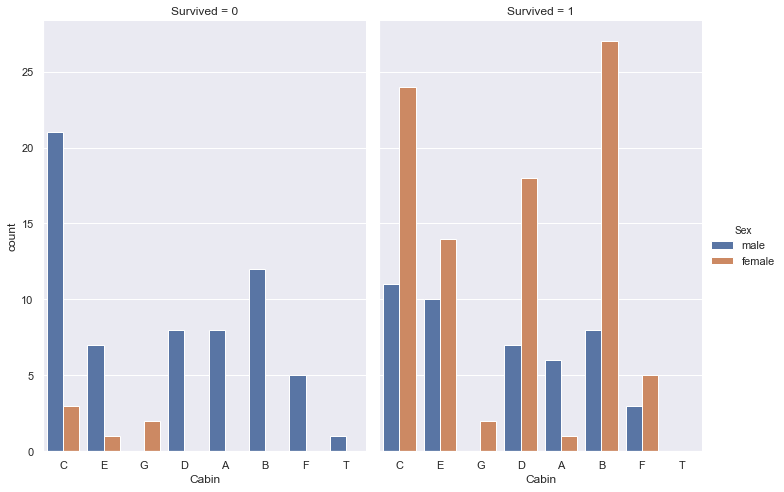

In [286]:
# Determine if being of a specific age range could be a result of being alive or dead
cabin_lived = lived_df[['Cabin','Survived']].dropna().sort_values(by='Cabin').rename(columns={"Survived": "Lived"})
cabin_died = died_df[['Cabin','Survived']].dropna().sort_values(by='Cabin').rename(columns={"Survived": "Died"})

cabin_lived.groupby('Cabin').count()

# Renames the cabins to their level designation (ex: 'A10' to 'A')
cabin_levels = ['A','B','C','D','E','F','G']
def renameCabin(df, _next=None):
    # If _next isn't assigned
    if _next is None: _next = 0
    
    # Get character
    _character = cabin_levels[_next]
    
    # Change the values
    try:
        df = df.replace(to_replace ='^[{}].+'.format(_character), value = _character, regex = True)
    except ValueError:
        pass
    
    # Return to continue operation
    _next += 1
    if _next < len(cabin_levels): return renameCabin(df,_next)
    else: return df

cabin_lived = renameCabin(cabin_lived)
cabin_died = renameCabin(cabin_died)
train_df['Cabin'] = renameCabin(train_df['Cabin'])
test_df['Cabin'] = renameCabin(train_df['Cabin'])
print(cabin_lived.groupby('Cabin').count(), '\n\n' , cabin_died.groupby('Cabin').count())

# Graph results
g = sns.catplot(x="Cabin", hue="Sex", col="Survived",
                data=train_df, kind="count",
                height=7, aspect=.7);


### Step 3: Preprocessing data for machine learning

Before the machine learning step, variables that are set to objects must be converted to **Int** from the `train_df` dataset. Taking a look below, it would appear that `Cabin`, `Ticket`, `Embarked`, `Sex`, and `Name` are object types. Variables like `Name`, `Ticket`, and `Embarked` I am not interested in to this version of the analysis, as such they will be dropped.

Once the unwanted variables are dropped I can go ahead and convert the other object-type variables to **Int**. This will be done using `sklearn` and its `LabelEncoder.fit_encoder` function to relabel the value of each variable with value between 0 and n-amount of its classes (minus 1), respectively (ex: `Sex` has two classes 'male' and 'female' => so they become `0` and `1`, respectively).

Upon reviewing the variable `Cabin`, it looks like there are a **lot** of missing data points. As such, I don't feel comfortable using it for further analysis; as such, I'll have to drop it.

In [287]:
# Trying to salvage data entries with missing data points using SimpleImputer and its 'mean' functionality. This 
# allows it to take the average of the missing data column and apply it to each missing entry point within said column
imputer = SimpleImputer(np.nan, "mean")

# Replace NaN (missing data) using imputer in train_df
train_df['Age'] = imputer.fit_transform(np.array(train_df['Age']).reshape(len(train_df), 1))
train_df.Embarked.fillna(method='ffill', inplace=True)

# Replace NaN (missing data) using imputer in train_df
test_df['Age'] = imputer.fit_transform(np.array(test_df['Age']).reshape(len(test_df), 1))
test_df.Embarked.fillna(method='ffill', inplace=True)
test_df.Fare.fillna(method='ffill', inplace=True)

# Replace NaN (missing data) using imputer in train_df
train_df = train_df.drop(['Name', 'Ticket', 'Embarked', 'Cabin', 'Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Name', 'Ticket', 'Embarked', 'Cabin', 'Parch', 'SibSp'], axis=1)

In [288]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
Fare           891 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [289]:
# Simplified function writting
le = LabelEncoder()

# Variables to be converted from their object type to Int
objects_cols = train_df.select_dtypes("object").columns
train_df = train_df.dropna()
test_df = test_df.dropna()

train_df[objects_cols] = train_df[objects_cols].apply(le.fit_transform)
test_df[objects_cols] = test_df[objects_cols].apply(le.fit_transform)

In [290]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,1,22.000000,7.2500
1,2,1,1,0,38.000000,71.2833
2,3,1,3,0,26.000000,7.9250
3,4,1,1,0,35.000000,53.1000
4,5,0,3,1,35.000000,8.0500
...,...,...,...,...,...,...
886,887,0,2,1,27.000000,13.0000
887,888,1,1,0,19.000000,30.0000
888,889,0,3,0,29.699118,23.4500
889,890,1,1,1,26.000000,30.0000


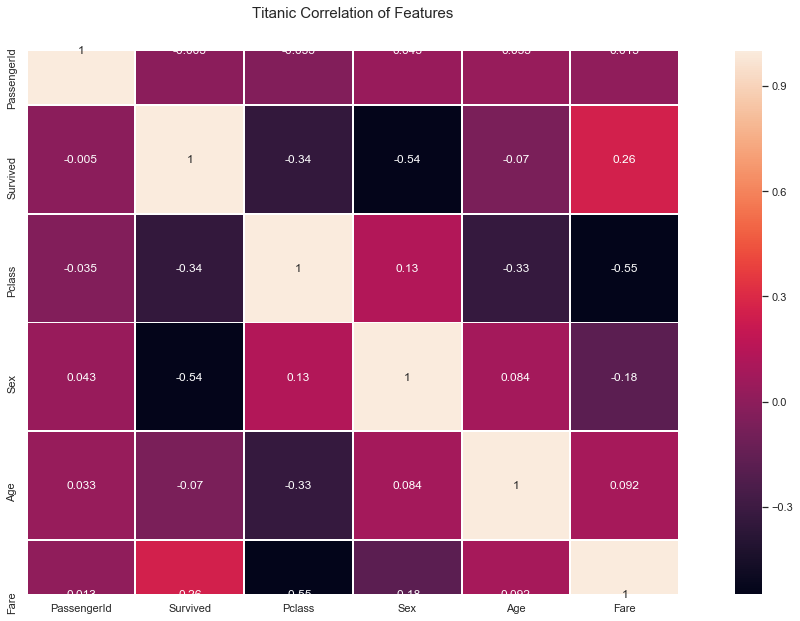

In [291]:
plt.figure(figsize=(20, 10))
plt.title('Titanic Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.corr(), linewidths=1, vmax=1.0, 
            square=True, linecolor='white', annot=True)

### Step 4: Train Machine Learning Models

In [292]:
# Removing and storing the 'Survived' variable to be set as the index for the machine learning step
X = train_df.drop(['Survived'], 1).values # Save those that survived
y = train_df['Survived'].values # Save those that have died
scale = StandardScaler()
scale.fit(X)
X = scale.transform(X)

# Split training data to 90% training data and 10% of it to self-test itself
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Make sure that there are no NaN values left in the test or train datasets. This will cause the Machine Learning
# models to break. 
print('Are there any NaN values left? {}'.format(np.any(np.isnan(X_train))))
print('Will there be issues counting to infinity? {}'.format(np.all(np.isfinite(X_train))))

# Class Model Idea from "Heart Disease - Classifications" kernel here: 
# https://www.kaggle.com/elcaiseri/heart-disease-classifications
# This class is used to encapsulated each machine learning model providing each with extra functions such as predictions,
# cross_validations, accuracies from the SKLearn library
class Model:
    
    def __init__(self, model):
        self.model = model
        self.X, self.y = X, y
        self.X_train, self.X_test, self.y_train, self.y_test = X_train, X_test, y_train, y_test
        self.HEADER = '\033[95m'
        self.OKBLUE = '\033[94m'
        self.OKGREEN = '\033[92m'
        self.WARNING = '\033[93m'
        self.FAIL = '\033[91m'
        self.ENDC = '\033[0m'
        self.BOLD = '\033[1m'
        self.UNDERLINE = '\033[4m'
        
        self.train()
    
    def model_name(self):
        model_name = type(self.model).__name__
        return model_name
        
    def cross_validation(self, cv=5):
        print(f"Evaluate {self.model_name()} score by cross-validation...")
        CVS = cross_val_score(self.model, self.X, self.y, scoring='accuracy', cv=cv)
        print(CVS)
        print("="*60, "\nMean accuracy of cross-validation: ", CVS.mean())
        
    def train(self):
        print(self.HEADER+f"\nTraining {self.model_name()} Model..."+self.ENDC)
        self.model.fit(X_train, y_train)
        print(self.OKBLUE+"Model Trained."+self.ENDC)
    
    def prediction(self, test_x=None, test=False):
        if test == False:
            y_pred = self.model.predict(self.X_test)
        else:
            y_pred = self.model.predict(test_x)
            
        return y_pred
    
    def accuracy(self):
        y_pred = self.prediction()
        y_test = self.y_test
        
        acc = accuracy_score(y_pred, y_test)
        print(self.OKGREEN+f"{self.model_name()} Model Accuracy: "+self.ENDC, acc)

Are there any NaN values left? False
Will there be issues counting to infinity? True


In [293]:
# Now to run the models!
gnb = GaussianNB()
print(type(gnb))
gnb = Model(gnb)
gnb.cross_validation()
gnb.accuracy()

svc = SVC()
print(type(svc))
svc = Model(svc)
svc.cross_validation()
svc.accuracy()

rfc = RandomForestClassifier()
print(type(rfc))
rfc = Model(rfc)
rfc.cross_validation()
rfc.accuracy()

<class 'sklearn.naive_bayes.GaussianNB'>

Training GaussianNB Model...
Model Trained.
Evaluate GaussianNB score by cross-validation...
[0.69832402 0.79888268 0.78089888 0.75842697 0.79661017]
Mean accuracy of cross-validation:  0.7666285432197538
GaussianNB Model Accuracy:  0.7777777777777778
<class 'sklearn.svm.classes.SVC'>

Training SVC Model...
Model Trained.
Evaluate SVC score by cross-validation...
[0.79329609 0.80446927 0.79775281 0.78651685 0.81920904]
Mean accuracy of cross-validation:  0.8002488131195726
SVC Model Accuracy:  0.7888888888888889
<class 'sklearn.ensemble.forest.RandomForestClassifier'>

Training RandomForestClassifier Model...
Model Trained.
Evaluate RandomForestClassifier score by cross-validation...


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

[0.67039106 0.81005587 0.84831461 0.83146067 0.83615819]
Mean accuracy of cross-validation:  0.7992760800727146
RandomForestClassifier Model Accuracy:  0.8


### Step 5: Predict Passengers that survived the Titanic!

Now with our models trained I can finally see how well they can predict who lives and dies! 

Each of the tested models will have their data saved in their respective .csv files and then submitted to the Kaggle competition.

In [294]:
# Setup the testing parameters!
test_X = test_df.values
test_X = scale.transform(test_X)

gnb_pred = gnb.prediction(test_x=test_X, test=True)
svc_pred = svc.prediction(test_x=test_X, test=True)
rfc_pred = rfc.prediction(test_x=test_X, test=True)

In [295]:
# Saving GaussianNB model results
submission_file['Survived'] = gnb_pred
submission_file.to_csv('gnb_submission.csv', index=False)

# Saving SVC model results
submission_file['Survived'] = svc_pred
submission_file.to_csv('svc_submission.csv', index=False)

# Saving RandomForrestClassifier model results
submission_file['Survived'] = rfc_pred
submission_file.to_csv('rfc_submission.csv', index=False)